# Data Story
## How safe is air travel? 
Travel by air is considered one of the safest forms of transportation. In the common wisdom, it's much safer to fly than to drive. However, it doesn't always feel that way! Airliners can carry many more people and when they crash, it can be spectacularly horrible. But the numbers can help reassure us. 

Let's have a look at air travel history from the beginning to see how air safety has changed. 

Starting with data hosted on Kaggle here:

https://www.kaggle.com/imdevskp/air-passengers-and-departures-data-from-19702018

we can see every passenger flight that's crashed with fatalities since 1908. This is when the Wright Flyer 3 crashed. Here's it's description:

In [1]:
import pandas as pd

crashes = pd.read_csv('crashes.csv',infer_datetime_format=True,parse_dates=True)
crashes['Datetime'] = pd.to_datetime(crashes['Date'],errors='coerce')
crashes.set_index(['Datetime'],inplace=True)
crashes.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn / ln,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground,Summary
Datetime,,,,,,,,,,,,,,,,,
1908-09-17,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1909-09-07,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
1912-07-12,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
1913-08-06,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
1913-09-09,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


The Wright brothers were involved with the very first aviation fatalities.

In [2]:
crashes.iloc[0]

Date                                                    September 17, 1908
Time                                                                 17:18
Location                                               Fort Myer, Virginia
Operator                                              Military - U.S. Army
Flight #                                                               NaN
Route                                                        Demonstration
AC  Type                                                  Wright Flyer III
Registration                                                           NaN
cn / ln                                                                  1
Total Aboard                                                             2
Passengers Aboard                                                        1
Crew Aboard                                                              1
Total Fatalities                                                         1
Passengers Fatalities    

In [3]:
crashes.iloc[0].Summary

'During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge, 26, who was a passenger. This was the first recorded airplane fatality in history. One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft. Orville Wright suffered broken ribs, pelvis and a leg. Selfridge suffered a crushed skull and died a short time later.'

It's a graphic tale about a horrible crash. Back then, they didn't have safety equipment like they do now. Helmets were softer and injuries were liklier. 

Now let's look at annual fatalities over time.

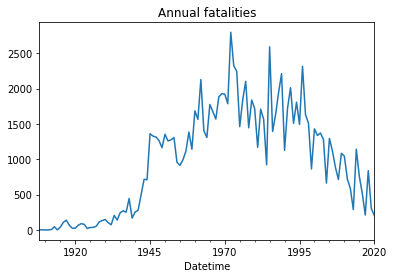

In [4]:
crashes['Total Fatalities'].resample('Y').sum().plot()

import matplotlib.pyplot as plt
plt.title('Annual fatalities')
plt.show()

Looks like annual fatalities peaked around 1970 and have been declining ever since. Now let's look at annual traffic (the flights that land safely never make the news!). 

In [5]:
passengers = pd.read_csv('passengers_count_long.csv',infer_datetime_format=True,parse_dates=True)
passengers.head()
passengers.set_index('Year')

,Country Name,Count
Year,,
1970,Afghanistan,84700
1970,Argentina,2332000
1970,Australia,7318700
1970,Austria,511400
1970,Belgium,1366200
...,...,...
2017,Samoa,81921
2017,"Yemen, Rep.",132571
2017,South Africa,20821044


We need to summarize these data. Sum over all countries by year to see total annual passenger traffic. 

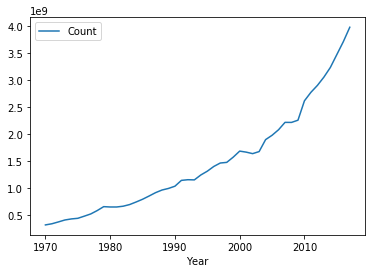

In [6]:
passengers.groupby(['Year']).sum().plot()

Passenger traffic looks like it's growing exponentially! This is during a period of time that fatalities are falling. Let's look at the ratio of annual fatalities to passengers.

In [7]:
annual_fatalities = pd.DataFrame(crashes['Total Fatalities'].resample('Y',kind='period').sum())
annual_passengers = passengers.groupby(['Year']).sum()

print('Fatalities',annual_fatalities.shape)
print('Passengers',annual_passengers.shape)

Fatalities (113, 1)
Passengers (48, 1)


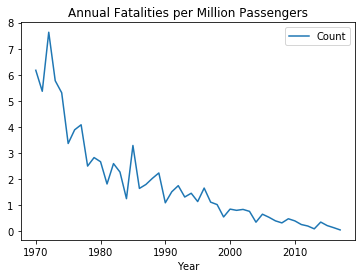

In [8]:
ratio = annual_fatalities['1970':'2017'].values / annual_passengers * 1e6
ratio.plot()
plt.title('Annual Fatalities per Million Passengers')
plt.show()

The number of fatalities per passenger has been declining exponentially as well. I'll bet that if we had data going back further in time, we'd see that aviation has been growing exponentially safer since the very beginning. 

To summarize, air traffic keeps getting safer every year!